In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#jupyter intelisense
%config IPCompleter.greedy=True

>This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

#### It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

In [2]:
imdb_txt = pd.read_csv('downloads/nb/imdb_labelled.txt', delimiter= '\t', header=None)
imdb_txt.columns = ['sentence', 'score']

ama_txt = pd.read_csv('downloads/nb/amazon_cells_labelled.txt', delimiter= '\t', header=None)
ama_txt.columns = ['sentence', 'score']

yelp_txt = pd.read_csv('downloads/nb/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_txt.columns = ['sentence', 'score']

Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

#### Let's review Amazon's DATA

In [3]:
keywords = ['Excellent', 'highly recommend', 'happy', 'It works', 'very satisfied', 
            'user friendly', 'Comfortable','great']

for key in keywords:
    ama_txt[str(key)] = ama_txt.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
ama_txt['allcaps'] = ama_txt.sentence.str.isupper()

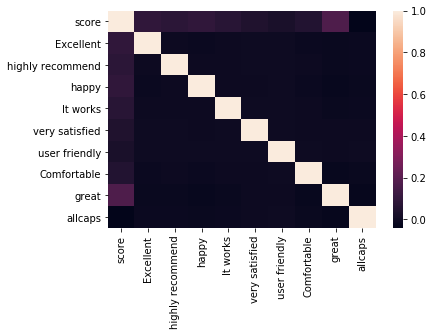

In [5]:
sns.heatmap(ama_txt.corr())

In [6]:
data = ama_txt[keywords + ['allcaps']]
target = ama_txt['sentence']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 996


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(data, target)
y_pred = gnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 988


In [10]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(data, target)
y_pred = cnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 989
